<a href="https://colab.research.google.com/github/shivam15668/FlickMatch_CNN_ImageClassifier/blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf 
from tensorflow.keras import datasets, layers , models 
import matplotlib.pyplot as plt
import numpy as np


In [3]:
(X_train , Y_train) , (X_test  , Y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
Y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
Y_train = Y_train.reshape(-1,)# to flatten and reshape model
Y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
classes = ["airplane" ,"automobile" , "bird" , "cat" ,  "deer" ,"dog" , "frog" , "horse" , "ship" , "truck" ]

In [8]:
def plot_sample(x,y,index):
  plt.figure(figsize = (15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

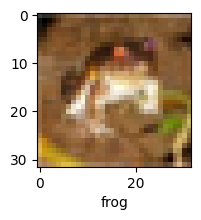

In [9]:
plot_sample(X_train , Y_train , 0)

In [10]:
#Normalizing data 
X_train = X_train/255
X_test = X_test/255

In [14]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000 , activation = "relu"),
    layers.Dense(1000 , activation = "relu"),
    layers.Dense(10 , activation = "sigmoid")#for 10 categories 
])
ann.compile(optimizer = 'SGD',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
ann.fit(X_train , Y_train , epochs = 1 , verbose = 1 )

1563/1563 [==============================] - 136s 86ms/step - loss: 1.8127 - accuracy: 0.3523


In [15]:
ann.evaluate(X_test , Y_test)

313/313 [==============================] - 9s 29ms/step - loss: 1.7212 - accuracy: 0.3821


[1.72115159034729, 0.382099986076355]

In [16]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("classification Report \n" , classification_report(Y_test , y_pred_classes))

313/313 [==============================] - 9s 29ms/step
classification Report 
               precision    recall  f1-score   support

           0       0.61      0.32      0.42      1000
           1       0.64      0.25      0.36      1000
           2       0.31      0.15      0.20      1000
           3       0.24      0.63      0.35      1000
           4       0.28      0.55      0.37      1000
           5       0.51      0.15      0.23      1000
           6       0.49      0.33      0.40      1000
           7       0.52      0.35      0.42      1000
           8       0.42      0.70      0.52      1000
           9       0.55      0.40      0.46      1000

    accuracy                           0.38     10000
   macro avg       0.46      0.38      0.37     10000
weighted avg       0.46      0.38      0.37     10000



In [19]:
# above code to show limitation of ANN 
# Now , to use CNN 

# convolution+ReLU + pooling + convolution+ReLU + pooling .... 
# + flatten ( dense head for 10 classes )
cnn =  models.Sequential([
    #cnn 
    
    layers.Conv2D(filters = 32 ,activation = 'relu' ,  kernel_size = (3,3) , input_shape = (32,32,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(filters = 64 ,activation = 'relu' ,  kernel_size = (3,3) , input_shape = (32,32,3)),
    layers.MaxPooling2D(2,2), 
    #dense
    layers.Flatten(),
    layers.Dense(64 , activation = "relu"),
    layers.Dense(10 , activation = "softmax")#for 10 categories 
])

In [21]:
cnn.compile(optimizer = 'adam' , 
              loss = 'sparse_categorical_crossentropy' , 
              metrics = ["accuracy"])

In [23]:
cnn.fit(X_train , Y_train , epochs = 1 ) # do check for high epochs , as i did it already 

1563/1563 [==============================] - 75s 48ms/step - loss: 0.5496 - accuracy: 0.8064


In [24]:
cnn.evaluate(X_test , Y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9181 - accuracy: 0.7037


[0.9181422591209412, 0.7037000060081482]

In [25]:
Y_test = Y_test.reshape(-1 ,)
Y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

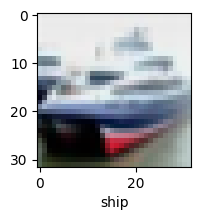

In [26]:
plot_sample(X_test , Y_test , 1)

In [27]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 4s 12ms/step


array([[1.6038258e-03, 5.7596641e-05, 9.4392832e-04, 5.2530187e-01,
        4.8177382e-05, 5.8242656e-02, 1.2036372e-01, 4.1055275e-05,
        2.9305872e-01, 3.3841355e-04],
       [1.8828658e-03, 2.6526785e-01, 7.4670072e-07, 2.3408373e-07,
        1.6794869e-08, 4.9028328e-09, 5.3666831e-09, 1.4320404e-09,
        7.3277807e-01, 7.0218332e-05],
       [1.2228437e-01, 8.6678021e-02, 8.0006348e-04, 1.5992078e-03,
        6.6480209e-04, 2.5061352e-04, 4.4364773e-05, 7.8554191e-03,
        7.6722747e-01, 1.2595621e-02],
       [9.8020607e-01, 2.8573992e-03, 3.9344979e-03, 6.8097717e-05,
        3.7152003e-04, 1.6372936e-05, 1.5070911e-04, 7.0266135e-05,
        1.2300589e-02, 2.4627303e-05],
       [2.6371403e-05, 2.6315491e-04, 1.3043828e-01, 6.5611163e-03,
        1.7232744e-01, 7.6447381e-04, 6.8942058e-01, 1.0656599e-06,
        1.8818460e-04, 9.2688224e-06]], dtype=float32)

In [28]:
#argmax returning index of maximmum argument 
y_classes = [np.argmax(element)for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [31]:
Y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

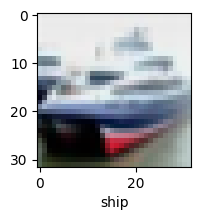

In [32]:
plot_sample(X_test , Y_test ,1)

In [34]:
classes[y_classes[1]]

'ship'

In [36]:
print("classification report : \n" , classification_report(Y_test , y_classes))

classification report : 
               precision    recall  f1-score   support

           0       0.68      0.80      0.73      1000
           1       0.80      0.85      0.82      1000
           2       0.57      0.62      0.60      1000
           3       0.57      0.44      0.50      1000
           4       0.64      0.67      0.66      1000
           5       0.67      0.55      0.61      1000
           6       0.73      0.81      0.77      1000
           7       0.75      0.74      0.74      1000
           8       0.80      0.80      0.80      1000
           9       0.81      0.76      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

